***Kaggle link for the dataset used***: https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

I downloaded and renamed the csv file to heart-disease.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("heart-disease.csv")

In [ ]:
data.describe()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,87.612784,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,151.000000,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,226.500000,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,302.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [ ]:
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [ ]:
data.tail()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no
302,302,57,female,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,no


In [ ]:
data['sex'].replace(['female','male'],[0,1],inplace=True)

In [ ]:
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [ ]:
data.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [ ]:
data

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
5,5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,296,63,0,0,124.0,197.0,0,1,136.0,1,0.0,1,0,2,no
298,298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no


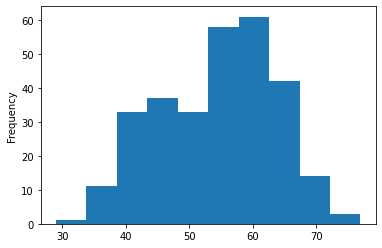

In [ ]:
data.age.plot.hist();

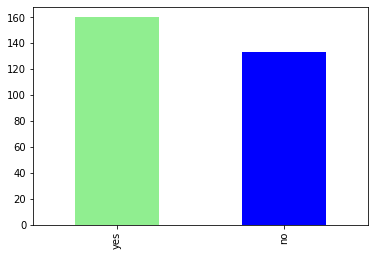

In [ ]:
data["target"].value_counts().plot(kind="bar", color=["lightgreen", "blue"]);

In [ ]:
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
no,23,110
yes,68,92


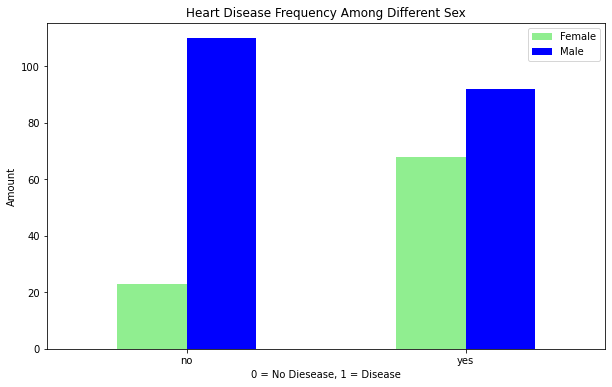

In [ ]:
pd.crosstab(data.target, data.sex).plot(kind="bar",figsize=(10, 6),color=["lightgreen", "blue"])
plt.title("Heart Disease Frequency Among Different Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

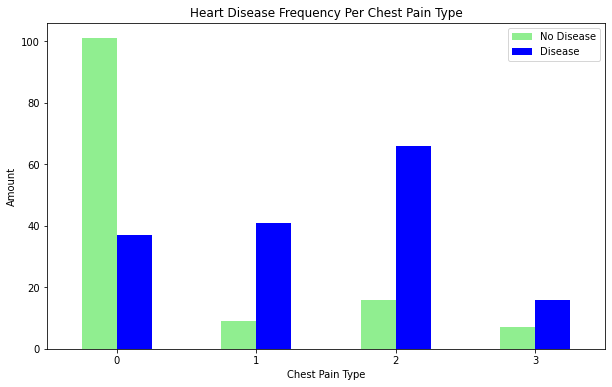

In [ ]:
pd.crosstab(data.cp, data.target).plot(kind="bar",figsize=(10, 6),color=["lightgreen", "blue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

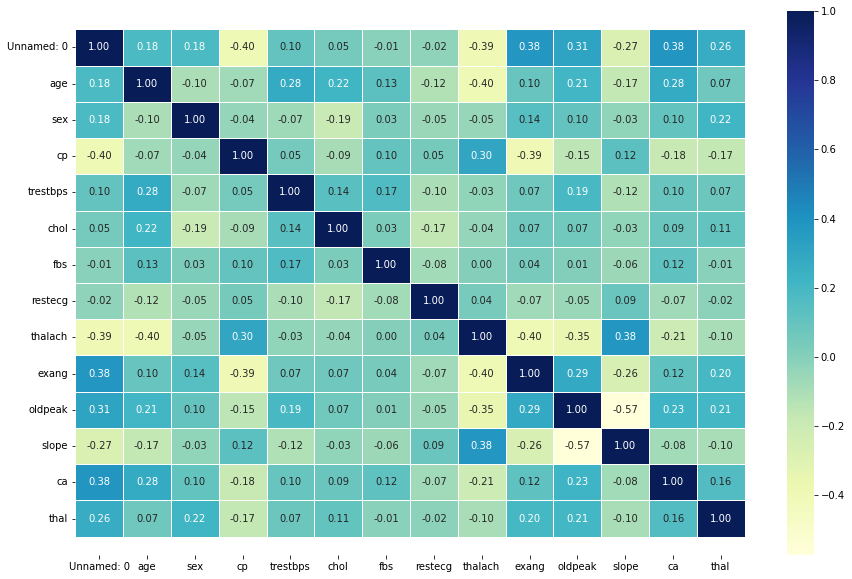

In [ ]:
matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x432 with 0 Axes>

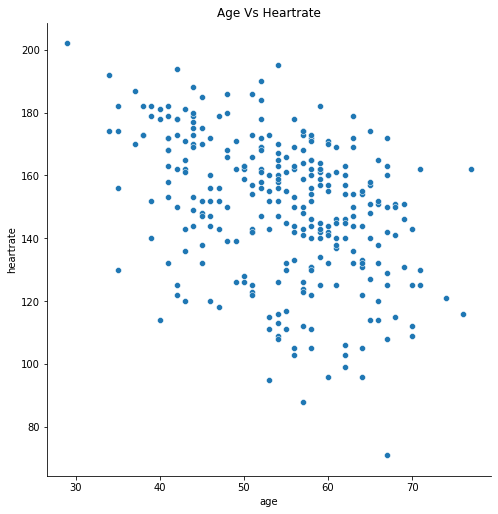

In [ ]:
plt.figure(figsize=(10,6))
sns.pairplot(data,x_vars=['age'],y_vars=['thalach'],size=7,kind='scatter')
plt.xlabel('age')
plt.ylabel('heartrate')
plt.title('Age Vs Heartrate')
plt.show();

In [ ]:
X = data.drop("target", axis=1)

y = data["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42);

In [ ]:
X_train

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
217,217,63,1,0,130.0,330.0,1,0,132.0,1,1.8,2,3,3
236,236,58,1,0,125.0,300.0,0,0,171.0,0,0.0,2,2,3
233,233,64,1,0,120.0,246.0,0,0,96.0,1,2.2,0,1,2
76,76,51,1,2,125.0,245.0,1,0,166.0,0,2.4,1,0,2
27,27,51,1,2,110.0,175.0,0,1,123.0,0,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,194,60,1,2,140.0,185.0,0,0,155.0,0,3.0,1,0,2
74,74,43,0,2,122.0,213.0,0,1,165.0,0,0.2,1,0,2
110,110,64,0,0,180.0,325.0,0,1,154.0,1,0.0,2,0,2
278,278,58,0,1,136.0,319.0,1,0,152.0,0,0.0,2,2,2


In [ ]:
y_test

87     yes
268     no
47     yes
182     no
148    yes
129    yes
234     no
122    yes
10     yes
94     yes
152    yes
283     no
35     yes
289     no
228     no
80     yes
48     yes
6      yes
238     no
251     no
128    yes
245     no
287     no
105    yes
78     yes
279     no
282     no
113    yes
63     yes
208     no
44     yes
59     yes
293     no
121    yes
62     yes
170     no
290     no
117    yes
164    yes
66     yes
151    yes
69     yes
277     no
163    yes
187     no
32     yes
24     yes
26     yes
285     no
123    yes
253     no
82     yes
19     yes
178     no
220     no
183     no
189     no
173     no
7      yes
Name: target, dtype: object

In [ ]:
models =KNeighborsClassifier(),
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
train_scores = []
test_scores = []
neighbors = range(1, 21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train)) 
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.9786324786324786,
 1.0,
 0.9871794871794872,
 0.9786324786324786,
 0.9871794871794872,
 0.9829059829059829,
 0.9829059829059829,
 0.9914529914529915,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9829059829059829,
 0.9871794871794872,
 0.9829059829059829,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872]

In [ ]:
test_scores

[0.9491525423728814,
 0.9830508474576272,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9830508474576272,
 0.9830508474576272,
 0.9830508474576272,
 0.9830508474576272,
 0.9830508474576272,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]